# Linear Regression

This notebook will solve the exercises relative to Linear Regression using Python.

The exercises are two: the first involves a Linear Regression with one variable and the second a multiple variable regression.

# Linear Regression with one variable

### Importing the data

The data imported contains two rows: the population of some city (x) and the profit of a food truck on that city (y). Our objective is to train a linear regression model so we can predict some profit given a city population. 

The first step will be importing the data into two numpy arrays and then plotting the data.

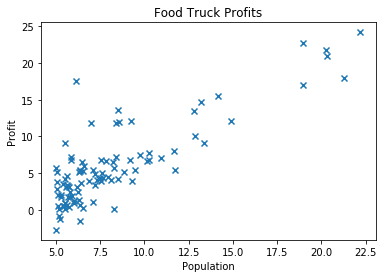

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.loadtxt('ex1data1.txt', delimiter=',')
x = data[:,0]
y = data[:,1]
m = len(x)
x = x.reshape(m,1)
y = y.reshape(m,1)

plt.scatter(x, y, marker='x')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Food Truck Profits')
plt.show()

Now, we add a column of ones to x (so we can use a vectorized form into our algorithm) and then define two functions: compute_cost and gradient_descent. The compute_cost calculates a cost given some parameters theta and the gradient_descent trains the parameter theta until some number of iterations.

In [2]:
one = np.ones((m,1))

x = np.concatenate((one, x), axis=1)

### Applying gradient descent

In [3]:
def compute_cost(x, y, theta):
    m = len(y)
    dist = np.matmul(x, theta) - y
   
    J = (1/(2 * m)) * np.matmul(dist.T, dist)
    
    return J.item()

def gradient_descent(x, y, theta, alpha, num_iters):
    m = len(y)
    J_list = []
    
    for i in range(1,num_iters+1):
        distances = np.matmul(x, theta) - y
        theta_diff = alpha * (1/m) * np.matmul(distances.T, x)
        theta = theta - theta_diff.T
        
        J = compute_cost(x, y, theta)
        J_list.append(J)
    
    return theta, J_list

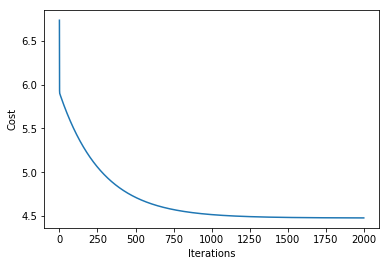

In [4]:
alpha = 0.01
num_iters = 2000
theta = np.zeros((2,1))

theta, J_list = gradient_descent(x, y, theta, alpha, num_iters)
plt.plot(J_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


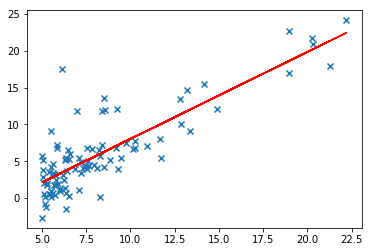

In [5]:
prediction = x @ theta
plt.scatter(x[:,1], y, marker='x')
plt.plot(x[:,1], prediction, c='red')
plt.show()

### Making predictions

In [6]:
predict1 = np.array([1,3.5]) @ theta
predict2 = np.array([1,7]) @ theta

print('For a population of 3500, we predict a profit of {}'.format(predict1.item() * 10000))
print('For a population of 7000, we predict a profit of {}'.format(predict2.item() * 10000))

For a population of 3500, we predict a profit of 3496.761389277094
For a population of 7000, we predict a profit of 44874.20850578529


# Linear Regression with multiple variables

The problem is similar to the last exercise, but we will instead use x with two features.The data used will contain the size of some house (in square feets), the number of bedrooms and the price of the house.

### Importing and normalizing the data

In [7]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('ex1data2.txt', delimiter=',')

y = data[:,2]
m = len(y)
y = y.reshape(m,1)

x = data[:,[0,1]]

Before applying the gradient_descent, we will normalize the features. We will do this be subtracting the mean and then dividing by the standart deviation.

In [8]:
def normalize(array):
    mu = array.mean(axis=0)
    array = array - mu
    sigma = array.std(axis=0)
    array = array / sigma
    return mu, sigma, array

In [9]:
mu, sigma, x = normalize(x)
one = np.ones((m,1))
x = np.concatenate((one, x), axis=1)

### Applying gradient descent

Before applying the gradient descent for a larger number of iterations, we will test some values of alpha in 500 iterations to see the best value to be chosen.

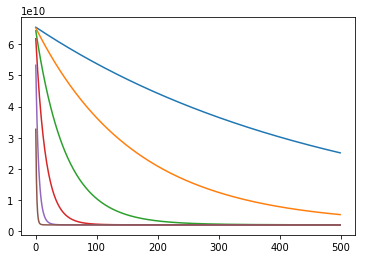

In [10]:
num_iters = 500
theta = np.zeros((3,1))

theta, J1_list = gradient_descent(x, y, theta, 0.001, num_iters)
theta = np.zeros((3,1))
theta, J2_list = gradient_descent(x, y, theta, 0.003, num_iters)
theta = np.zeros((3,1))
theta, J3_list = gradient_descent(x, y, theta, 0.01, num_iters)
theta = np.zeros((3,1))
theta, J4_list = gradient_descent(x, y, theta, 0.03, num_iters)
theta = np.zeros((3,1))
theta, J5_list = gradient_descent(x, y, theta, 0.1, num_iters)
theta = np.zeros((3,1))
theta, J6_list = gradient_descent(x, y, theta, 0.3, num_iters)
theta = np.zeros((3,1))

plt.plot(J1_list)
plt.plot(J2_list)
plt.plot(J3_list)
plt.plot(J4_list)
plt.plot(J5_list)
plt.plot(J6_list)
plt.show()

After looking at the plot, we will use a value of apha equal to 0.3 and 400 iterations.

In [11]:
alpha = 0.3
num_iters = 400
theta = np.zeros((3,1))

theta, J_list = gradient_descent(x, y, theta, alpha, num_iters)
print(theta)

[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


### Making predictions

In [12]:
one = np.ones((1,1))
x_predict = (np.array([1650, 3]) - mu) / sigma
x_predict = x_predict.reshape(2,1)

x_predict = np.concatenate((one,x_predict), axis=0)
x_predict = x_predict.T

prediction = x_predict @ theta

print('For a house with 1650 square feet and 3 bathrooms, we predict a price of ${}'.format(round(prediction.item(),2)))

For a house with 1650 square feet and 3 bathrooms, we predict a price of $293081.46


### Making predictions using the Normal Equation

One alternative to gradient descent is to calculate the thetas and make the prediction using the normal equation (without needing to scale x)

In [13]:
x = data[:,[0,1]]
one = np.ones((m,1))
x = np.concatenate((one, x), axis=1)

In [14]:
def normal_equation(x, y):
    
    theta = np.linalg.inv(x.T @ x) @ (x.T @ y)
    return theta    

In [15]:
theta = normal_equation(x,y)

x_predict = np.array([1, 1650, 3])
prediction = x_predict @ theta

print('For a house with 1650 square feet and 3 bathrooms, we predict a price of ${}'.format(round(prediction.item(),2)))

For a house with 1650 square feet and 3 bathrooms, we predict a price of $293081.46
